<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/blob/master/Unit%201%20Linear%20Classifiers%20and%20Generalizations%20(2%20weeks)/Project%201%3A%20Automatic%20Review%20Analyzer/Project1_Automatic_Review_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Automatic Review Analyzer

---



## Packages and libraries

In [1]:
import sys

url = "https://github.com/Data-Science-and-Data-Analytics-Courses/Notebook-Library"

!git clone "{url}" "/nblib"
%run "/nblib/.Importable.ipynb"
sys.path.append("/")

Cloning into '/nblib'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 12), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
from google.colab import drive
from nblib import Git

URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019"
nbdir_rel = "Unit 1 Linear Classifiers and Generalizations (2 weeks)/Project 1: Automatic Review Analyzer/"

REPO = Git.clone(URL)
NBDIR = REPO/nbdir_rel
os.chdir(NBDIR)

importing Jupyter notebook from /nblib/Git.ipynb
Cloning into '/content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 267 (delta 78), reused 0 (delta 0), pack-reused 149
Receiving objects: 100% (267/267), 1.34 MiB | 11.42 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [0]:
from pathlib import Path
import numpy as np
import numpy.testing as npt
import re

sys.path.append(Path("sentiment_analysis").resolve().as_posix())
from sentiment_analysis import utils
import project1 as p1
from Project1_Algorithms import perceptron, average_perceptron, pegasos

## Algorithm Discussion

### Plot

(array([3.9174, 4.164 ]), -8.0)


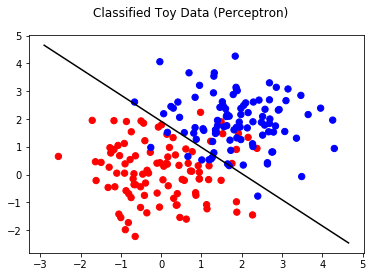

(array([3.4782605, 3.611061 ]), -6.373)


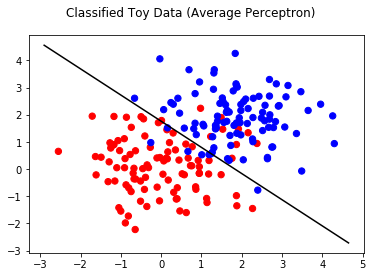

(array([0.73464631, 0.63002246]), -1.2195071848898564)


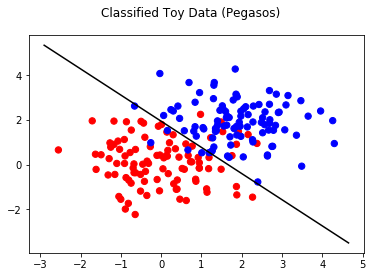

In [4]:
toy_features, toy_labels = toy_data = utils.load_toy_data('sentiment_analysis/toy_data.tsv')
T = 10
L = 0.2

thetas = perceptron(toy_features, toy_labels, T)
print(thetas)
utils.plot_toy_data("Perceptron", toy_features, toy_labels, thetas)

thetas = average_perceptron(toy_features, toy_labels, T)
print(thetas)
utils.plot_toy_data("Average Perceptron", toy_features, toy_labels, thetas)

thetas = pegasos(toy_features, toy_labels, T, L)
print(thetas)
utils.plot_toy_data("Pegasos", toy_features, toy_labels, thetas)

### Convergence

In [5]:
print("Perceptron")
for T in [100, 500, 1000]:
  thetas = perceptron(toy_features, toy_labels, T)
  print(T, thetas)

print("Average Perceptron")
for T in [100, 500, 1000]:
  thetas = average_perceptron(toy_features, toy_labels, T)
  print(T, thetas)

print("Pegasos")
for T in [100, 500, 1000]:
  thetas = pegasos(toy_features, toy_labels, T, L)
  print(T, thetas)

Perceptron
100 (array([3.9265, 3.5206]), -7.0)
500 (array([3.3189, 5.5648]), -8.0)
1000 (array([2.5128, 4.1252]), -7.0)
Average Perceptron
100 (array([3.87351139, 3.88024196]), -7.01295)
500 (array([3.8687851 , 3.89030957]), -7.05808)
1000 (array([3.87607472, 3.90731127]), -7.081905)
Pegasos
100 (array([0.689572, 0.571497]), -1.2426141399854491)
500 (array([0.6708388 , 0.58498822]), -1.2308657435730184)
1000 (array([0.66139583, 0.59495516]), -1.2310716055759896)


## Classification and Accuracy


In [0]:
def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses theta and theta_0 to classify a set of
    data points.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
                theta - A numpy array describing the linear classifier.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    Returns: A numpy array of 1s and -1s where the kth element of the array is
    the predicted classification of the kth row of the feature matrix using the
    given theta and theta_0. If a prediction is GREATER THAN zero, it should
    be considered a positive classification.
    """
    # Your code here
    predictions_raw = feature_matrix.dot(theta) + theta_0
    predictions = np.where(predictions_raw > 0, 1.0, -1.0)
    
    return predictions
  
def test_classify(feature_matrix, theta, theta_0, exp_predictions):
  predictions = classify(feature_matrix, theta, theta_0)
  npt.assert_equal(predictions, exp_predictions)

feature_matrix = np.array([[1, 1], [1, 1], [1, 1]])
theta = np.array([1, 1])
theta_0 = 0
exp_predictions = np.array([1, 1, 1])
test_classify(feature_matrix, theta, theta_0, exp_predictions)

feature_matrix = np.array([[-1, 1]])
theta = np.array([1, 1])
theta_0 = 0
exp_predictions = np.array([-1])
test_classify(feature_matrix, theta, theta_0, exp_predictions)

In [0]:
def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()
  
def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.

    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    # Your code here
    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)
    
    # On training data
    predictions = classify(train_feature_matrix, theta, theta_0)
    train_accu = accuracy(predictions, train_labels)
    
    # On validation data
    predictions = classify(val_feature_matrix, theta, theta_0)
    val_accu = accuracy(predictions, val_labels)
    
    return train_accu, val_accu
  
def test_classifier_accuracy(classifier, train_feature_matrix, val_feature_matrix, 
                             train_labels, val_labels, exp_train_accu, exp_val_accu, **kwargs):
  train_accu, val_accu = classifier_accuracy(classifier, train_feature_matrix, val_feature_matrix, 
                                             train_labels, val_labels, **kwargs)
  npt.assert_equal(train_accu, exp_train_accu)
  npt.assert_equal(val_accu, exp_val_accu)

train_feature_matrix = np.array([[1, 0], [1, -1], [2, 3]])
val_feature_matrix = np.array([[1, 1], [2, -1]])
train_labels = np.array([1, -1, 1])
val_labels = np.array([-1, 1])
exp_train_accu, exp_val_accu = 1, 0
T=1
test_classifier_accuracy(perceptron, train_feature_matrix, val_feature_matrix, 
                             train_labels, val_labels, exp_train_accu, exp_val_accu, T=T)

train_feature_matrix = np.array([[1, 0], [1, -1], [2, 3]])
val_feature_matrix = np.array([[1, 1], [2, -1]])
train_labels = np.array([1, -1, 1])
val_labels = np.array([-1, 1])
exp_train_accu, exp_val_accu = 1, 0
T=1
L=0.2
test_classifier_accuracy(pegasos, train_feature_matrix, val_feature_matrix, 
                             train_labels, val_labels, exp_train_accu, exp_val_accu, T=T, L=L)

In [8]:
# Load data
train_data = utils.load_data('sentiment_analysis/reviews_train.tsv')
val_data = utils.load_data('sentiment_analysis/reviews_val.tsv')
test_data = utils.load_data('sentiment_analysis/reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

# Run algorithms
T = 10
L = 0.01

print("Perceptron")
train_accu, val_accu = classifier_accuracy(perceptron, train_bow_features,
                                           val_bow_features, train_labels,val_labels,T=T)
print(train_accu, val_accu)

print("Average Perceptron")
train_accu, val_accu = classifier_accuracy(average_perceptron, train_bow_features,
                                           val_bow_features,train_labels,val_labels,T=T)
print(train_accu, val_accu)

print("Pegasos")
train_accu, val_accu = classifier_accuracy(pegasos, train_bow_features,
                                           val_bow_features,train_labels,val_labels,T=T,L=L)
print(train_accu, val_accu)

Perceptron
0.81575 0.716
Average Perceptron
0.97275 0.798
Pegasos
0.91425 0.79


## Parameter Tuning
Find optimal parameters for each algorithm

### Performance After Tuning


In [0]:
def tune_pct(train_feats, train_labels, val_feats, val_labels, Ts, avg_pct=False):
  """
  Find T in Ts that results in best accuracy on val_feats
  avg_pct: if False, perceptron algorithm; average_perceptron otherwise
  """
  
  classifier = (perceptron if not avg_pct else average_perceptron)
  Ts = np.asarray(Ts)
  
  accus = np.zeros(len(Ts))
  for i in np.ndindex(*accus.shape):
    T = Ts[i]
    train_accu, val_accu = classifier_accuracy(classifier, train_feats, val_feats,
                                               train_labels, val_labels, T=T)
    accus[i] = val_accu

  i_max = np.argmax(accus)
  
  return Ts[i_max], accus[i_max]

def tune_peg(train_feats, train_labels, val_feats, val_labels, Ts, Ls):
  """
  Find T, L in Ts, Ls that result in best accuracy on val_feats for Pegasos
  """
  
  Ts = np.asarray(Ts)
  Ls = np.asarray(Ls)
  
  accus = np.zeros((len(Ts), len(Ls)))
  for i, j in np.ndindex(*accus.shape):
    T, L = Ts[i], Ls[j]
    train_accu, val_accu = classifier_accuracy(pegasos, train_feats, val_feats,
                                               train_labels, val_labels, T=T, L=L)
    accus[i, j] = val_accu

    i_max, j_max = ind = np.unravel_index(accus.argmax(), accus.shape)
  
  return (Ts[i_max], Ls[j_max]), accus[ind]

In [10]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)

# values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

print("Perceptron")
opt_T, opt_accu = tune_pct(*data, Ts)
print(opt_T, opt_accu)

print("Average Perceptron")
opt_T, opt_accu = tune_pct(*data, Ts, avg_pct=True)
print(opt_T, opt_accu)

# fix values for L and T while tuning Pegasos T and L, respective
print('Pegasos: tune T')
fix_L = 0.01
(fix_T, opt_L), opt_accu = tune_peg(*data, Ts, [fix_L])
print((fix_T, opt_L), opt_accu)

print('Pegasos: tune L')
(opt_T, opt_L), opt_accu = tune_peg(*data, [fix_T], Ls)
print((opt_T, opt_L), opt_accu)

Perceptron
25 0.794
Average Perceptron
25 0.8
Pegasos: tune T
(25, 0.01) 0.806
Pegasos: tune L
(25, 0.01) 0.806


### Accuracy on the test set


In [11]:
print("Pegasos")
best_classifier = pegasos
best_T, best_L = 25, 0.01
train_accu, test_accu = classifier_accuracy(best_classifier, train_bow_features, test_bow_features,
                                            train_labels, test_labels, T=best_T, L=best_L)
print(train_accu, test_accu)

Pegasos
0.9185 0.802


### The most explanatory unigrams


In [12]:
best_theta, best_theta_0 = best_classifier(train_bow_features, train_labels, T=best_T, L=best_L)
wordlist = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

print("Most impactful in predicting negative labels")
print(sorted_word_features[:-11:-1])

Most Explanatory Word Features
['delicious', 'great', '!', 'best', 'perfect', 'loves', 'wonderful', 'glad', 'love', 'quickly']
Most impactful in predicting negative labels
['disappointed', 'bad', 'not', 'however', 'but', 'unfortunately', 'awful', 'money', 'ok', '$']


## Feature Engineering


### Remove Stop Words
Reconstruct dictionary, excluding stop words.  


In [24]:
# New data
with open("sentiment_analysis/stopwords.txt") as f:
  stop_words = re.findall(r'\w+', f.read())
dictionary_rest = p1.bag_of_words(train_texts, stop_words=stop_words)
train_features_rest = p1.extract_bow_feature_vectors(train_texts, dictionary_rest)
val_features_rest = p1.extract_bow_feature_vectors(val_texts, dictionary_rest)
test_features_rest = p1.extract_bow_feature_vectors(test_texts, dictionary_rest)

print("Accuracy on the test set")
train_accu, test_accu = classifier_accuracy(best_classifier, train_features_rest, test_features_rest,
                                            train_labels, test_labels, T=best_T, L=best_L)
print(train_accu, test_accu)

Accuracy on the test set
0.91575 0.808


### Change Binary Features to Counts Features


In [34]:
train_features_count = p1.extract_bow_feature_vectors(train_texts, dictionary_rest, binary=False)
val_features_count = p1.extract_bow_feature_vectors(val_texts, dictionary_rest, binary=False)
test_features_count = p1.extract_bow_feature_vectors(test_texts, dictionary_rest, binary=False)

print("Accuracy on the test set")
train_accu, test_accu = classifier_accuracy(best_classifier, train_features_count, test_features_count,
                                            train_labels, test_labels, T=best_T, L=best_L)
print(train_accu, test_accu)

Accuracy on the test set
0.89275 0.77
